In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train,y_train) , (X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape   # 28 * 28 pixel image

(28, 28)

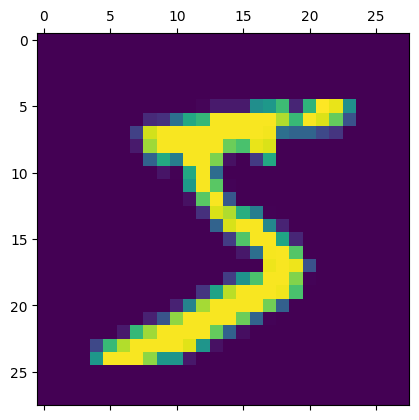

In [7]:
plt.matshow(X_train[0])

In [8]:
# scaling the array values to [0,1]
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train[0]  # number 5 represented in a 2-D array where 0 = black, 255 = white

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
y_train[0]

np.uint8(5)

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
# flattening the 28 * 28 pixels image into 1-D array with dimension 784
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [13]:
X_train_flattened.shape

(60000, 784)

In [14]:
X_test_flattened.shape

(10000, 784)

In [15]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
# initially using only input layer with 784 neurons without any hidden layers
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

# sparse_categorical_crossentropy is used when the output variable(y_train) has integer values (in this dataset 0 to 9 digits)
# categorical_crossentropy is used when the output variable(y_train) is represented in one-hot encoder
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(X_train_flattened, y_train, epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8192 - loss: 0.7060
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9131 - loss: 0.3114
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9201 - loss: 0.2820
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9227 - loss: 0.2728
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9262 - loss: 0.2620


In [17]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9136 - loss: 0.2997


[0.26606351137161255, 0.9243999719619751]

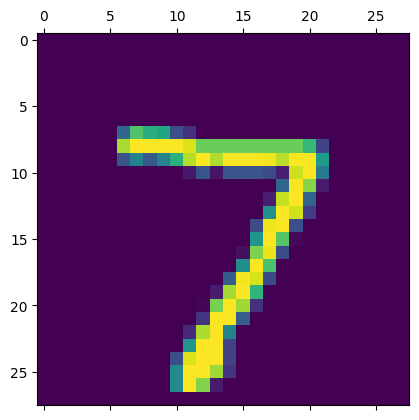

In [18]:
plt.matshow(X_test[0])

In [19]:
y_predict = model.predict(X_test_flattened)
y_predict[0]  # this gives 10 values representing the scores of every digit from 0 to 9 being outputs

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([2.3784662e-02, 3.0885880e-07, 5.2952666e-02, 9.5234877e-01,
       2.0893966e-03, 1.3023281e-01, 6.1115145e-07, 9.9973875e-01,
       6.6021256e-02, 5.4422402e-01], dtype=float32)

In [20]:
np.argmax(y_predict[0])
# for printing the score that is maximum out of all as it represents the chance of being correct...here it is 9.80 at 7th index being number 7 as output

np.int64(7)

In [21]:
y_test[0]

np.uint8(7)

In [22]:
# for metrics to be calculated, y_test values are in integer numbers so we should convert y_predict also in that format from arrayformat for analyzing.
y_predicted_labels = [np.argmax(i) for i in y_predict]
y_predicted_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [23]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    0,    2,    0,    5,    2,    2,    2,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   8,    9,  917,   16,   11,    4,   12,   11,   40,    4],
       [   2,    0,   17,  921,    0,   27,    1,   11,   23,    8],
       [   2,    1,    4,    1,  921,    0,    7,    4,   10,   32],
       [  10,    1,    3,   30,   10,  782,   11,    6,   32,    7],
       [  16,    3,    7,    1,    7,   18,  901,    2,    3,    0],
       [   2,    6,   22,    6,    8,    1,    0,  950,    1,   32],
       [   7,    8,    6,   20,    9,   35,    8,   12,  862,    7],
       [  11,    7,    1,   10,   30,    9,    0,   27,    5,  909]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

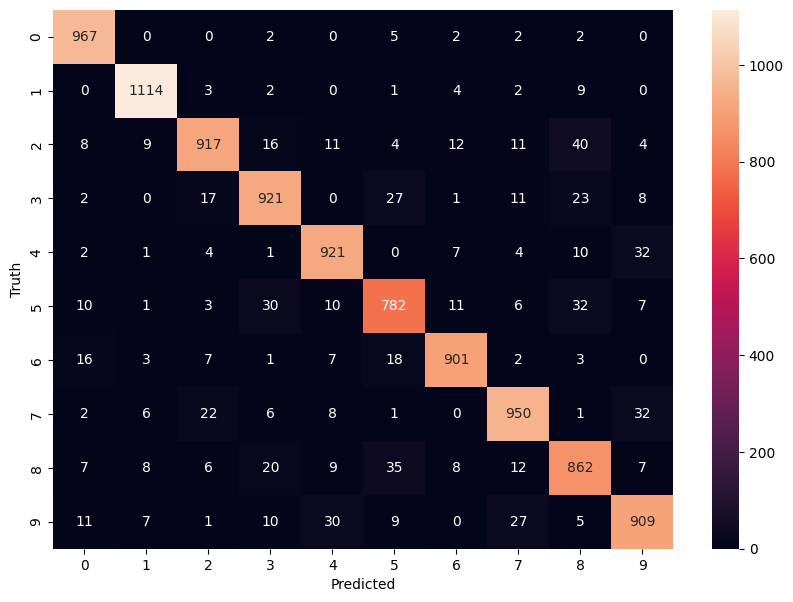

In [24]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [25]:
# Now adding an hidden layer to it
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8689 - loss: 0.4635
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9600 - loss: 0.1384
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9733 - loss: 0.0873
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9815 - loss: 0.0630
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9856 - loss: 0.0493


In [26]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9708 - loss: 0.0904


[0.07697770744562149, 0.9753999710083008]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

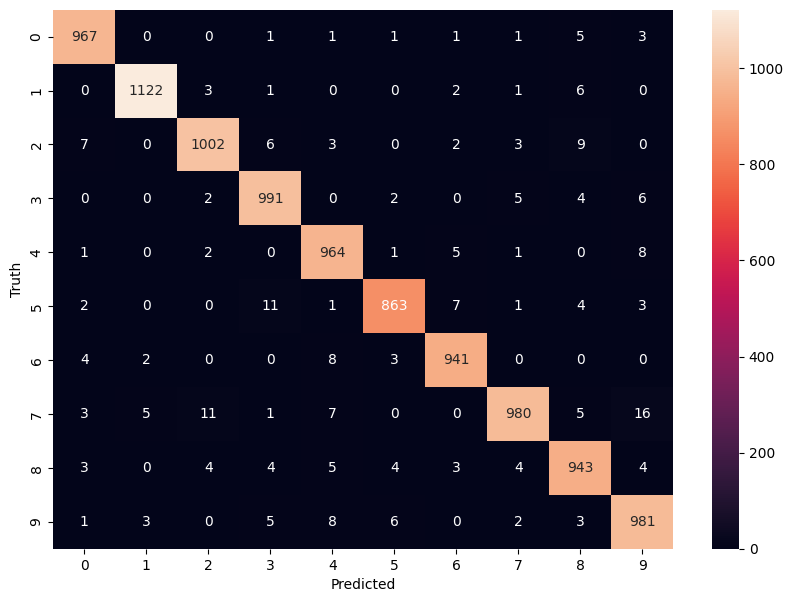

In [27]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [28]:
# instead of separately creating a flattened array(X_train_flattened), we can add flatten layer directly
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8658 - loss: 0.4641
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9584 - loss: 0.1434
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9723 - loss: 0.0937
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9805 - loss: 0.0661
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9839 - loss: 0.0519


In [29]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9705 - loss: 0.0965


[0.08328854292631149, 0.9747999906539917]

USING CNN


In [38]:
model1= keras.Sequential([
    # CNN
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)), #rgb value = 1 as dataset is grayscale (like MNIST) without the colors
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

     # dense layers(ANN)
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax') # we are using softmax to normalize the probability
])

In [39]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
model1.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8990 - loss: 0.3248
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9834 - loss: 0.0520
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9890 - loss: 0.0347
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9925 - loss: 0.0221
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9943 - loss: 0.0167
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9962 - loss: 0.0124
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9964 - loss: 0.0101
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9977 - loss: 0.0077
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9981 - loss: 0.0061
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9981 - loss: 0.0053


In [41]:
model1.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9863 - loss: 0.0584


[0.04299105331301689, 0.989799976348877]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Text(95.72222222222221, 0.5, 'Truth')

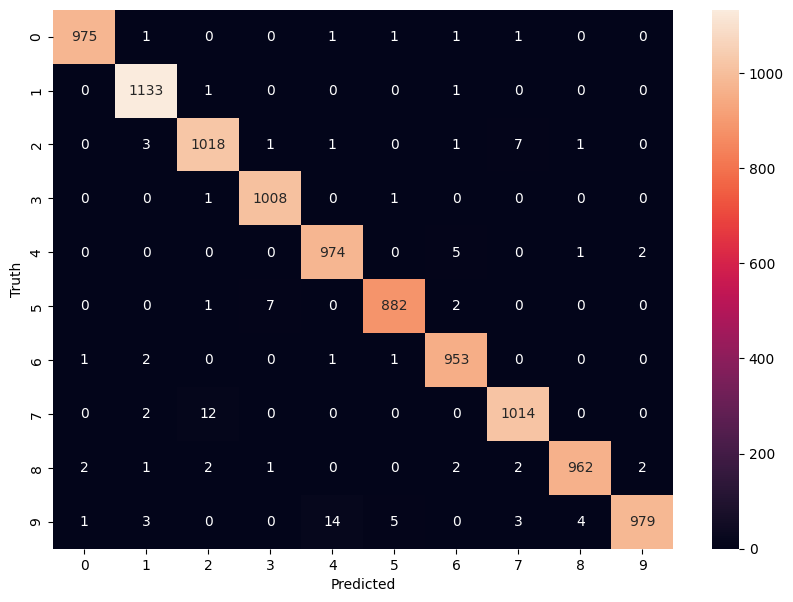

In [42]:
y_predicted_new = model1.predict(X_test)
y_predicted_labels_new = [np.argmax(i) for i in y_predicted_new]
cm1 = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels_new)

plt.figure(figsize = (10,7))
sn.heatmap(cm1, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [45]:
y_predicted_new = model1.predict(X_test)
y_predicted_labels_new = [np.argmax(i) for i in y_predicted]
y_predicted_labels_new[:10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[np.int64(7),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(4),
 np.int64(1),
 np.int64(4),
 np.int64(9),
 np.int64(5),
 np.int64(9)]

In [46]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)